# 第一章 协同推理和行动 ReAct

<div class="toc">
 <ul class="toc-item">
     <li><span><a href="#一、引言" data-toc-modified-id="一、引言">一、引言</a></span></li>
     <li>
         <span><a href="#二、ReAct 框架的核心要点" data-toc-modified-id="二、单一文本概括实验">二、ReAct 框架的核心要点</a></span>
         <ul class="toc-item">
             <li><span><a href="##2.1 ReAct 的关键原理" data-toc-modified-id="2.1 ReAct 的关键原理">2.1 ReAct 的关键原理</a></span></li> 
             <li><span><a href="##2.2 ReAct 的提示设计" data-toc-modified-id="2.2 ReAct 的提示设计">2.2 ReAct 的提示设计</a></span></li>
             </ul>
         </li>
     <li><span><a href="#三、ReAct 应用示例" data-toc-modified-id="三、ReAct 应用示例">三、ReAct 应用示例</a></span></li>
     <li><span><a href="#四、总结与讨论" data-toc-modified-id="四、总结与讨论">四、总结与讨论</a></span></li>
     </ul>
</div>

## 一、引言

大语言模型（Large Language Models, LLMs），例如 GPT-3.5 Turbo/GPT-4，在语言理解和交互式决策任务上展现出令人印象深刻的能力。然而，LLMs 在推理（例如思维链提示）和行动（例如行动计划生成）方面的能力是孤立研究和应用的（在 ReAct 出现之前，现在 LLMs 和 LLM-based Agent 的研究进展很快）。

ReAct 回答了这个问题：**如果这两种基本能力结合在一起会怎么样？**

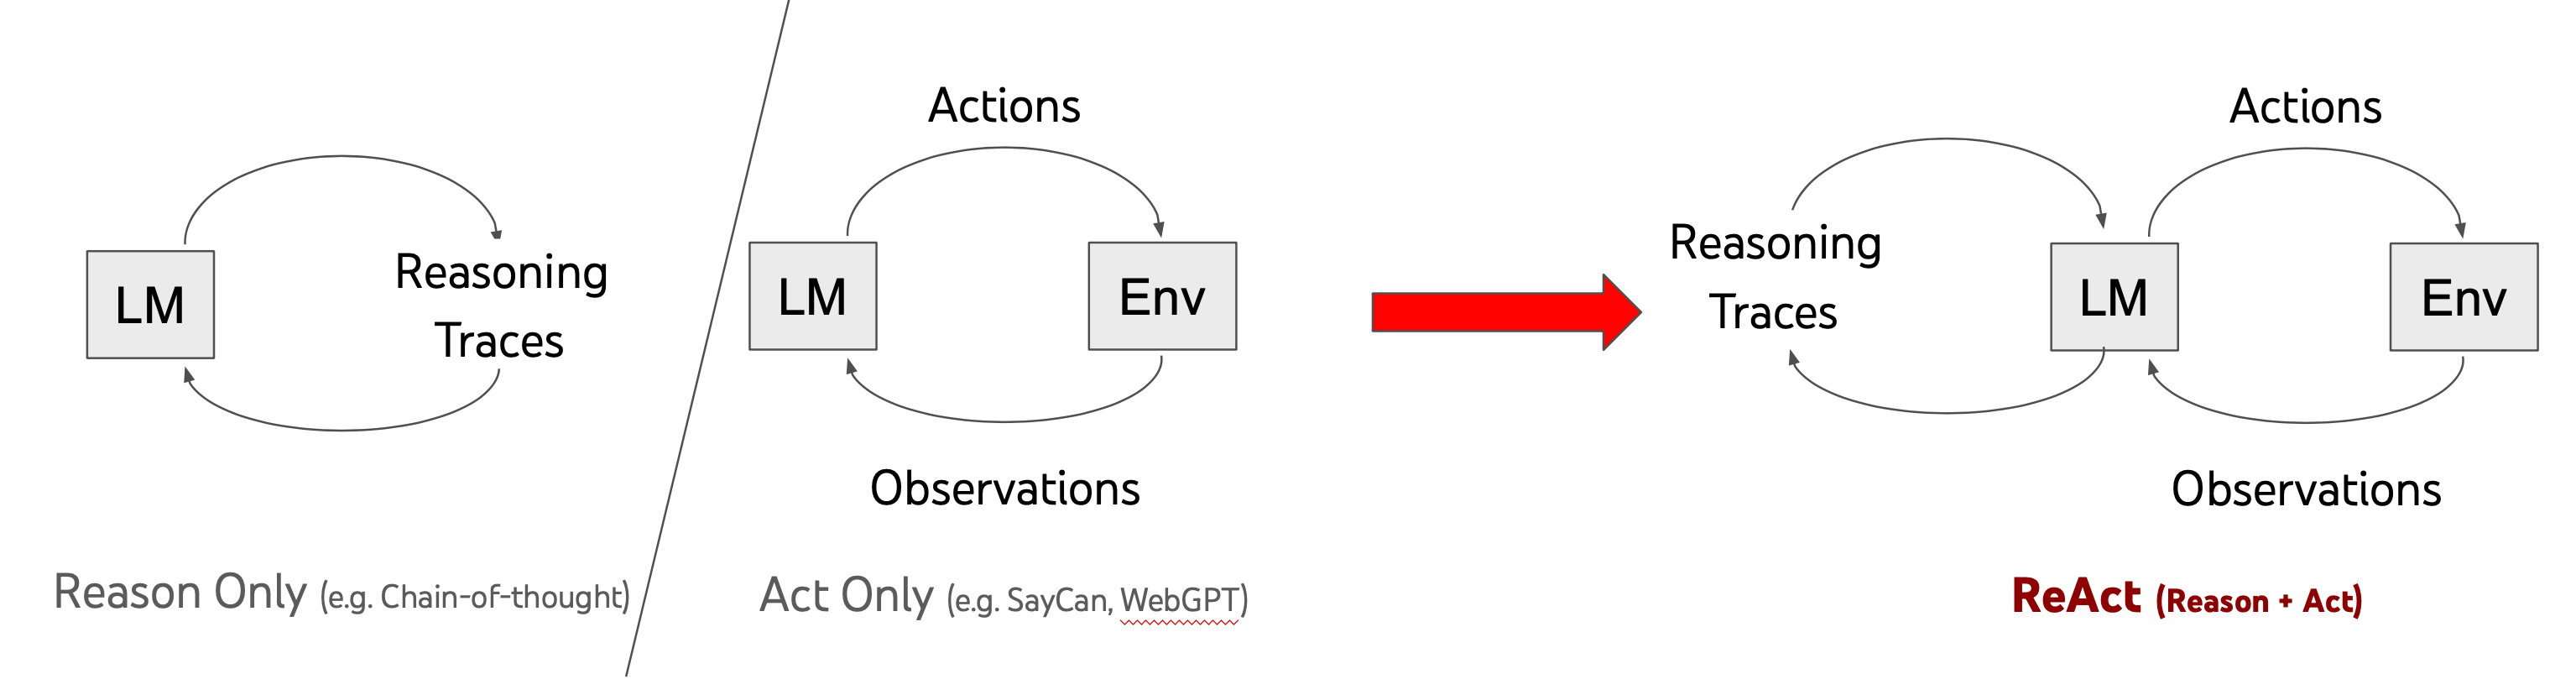

上面的示意图的来源：https://react-lm.github.io/

本章将详细介绍 ReAct 框架，其中 ReAct 是由 Reason（推理）和 Action（行动）组成的缩写，**ReAct = Reason + Action = 推理 + 行动**。通过深入阐述关键原理并提供实际代码示例，本章旨在帮助读者全面掌握 ReAct 的关键原理和实际应用。在阅读本章后，读者将能够更加专业、准确地理解并运用 ReAct 框架。

## 二、ReAct 框架的核心要点

### 2.1 ReAct 的关键原理

人类智能的独特之处在于将以任务为导向的行动与关于下一步行动的推理紧密结合。这种能力使我们能够迅速学习新任务并做出可靠的决策，同时适应未预见到的情况。ReAct 的目标是在语言模型中模拟这种协同效应，使其能够以交织的方式生成推理步骤和特定于任务的操作。

ReAct 框架的核心要点：**ReAct 方法通过引导大型语言模型生成与特定任务相关的推理文本，进而触发搜索或调用工具的动作，以提升问答任务的性能。** 具体而言，ReAct 采用了交替生成推理过程和任务特定行为的方式，使得两者之间能够协同配合。推理过程有助于模型进行归纳、跟踪和更新行动计划，并处理异常情况；而行动阶段则使模型能够与外部资源（如知识库或环境）进行交互，以获取额外信息。这种交互式的设计使得 ReAct 方法能够更加高效地完成问答任务，并且增强了模型在复杂环境下的适应能力。

### 2.2 ReAct 的提示设计

ReAct 提示设计的一个关键点是：few-shot task-solving 轨迹，**其本质在于充分利用上下文学习和提供好的演示（Demonstrations）**。这些轨迹由人工编写的文本推理和操作序列以及相应操作环境的观察结果构成。下面是一个 ReAct 提示的示例（摘自论文）：

```python
问题 科罗拉多造山带东部区域延伸到的区域的海拔范围是多少？

思考 1 我需要搜索科罗拉多造山带，找到科罗拉多造山带东段延伸的区域，然后找到该区域的海拔范围。
操作 1 搜索 [科罗拉多造山带]
观察 1 科罗拉多造山带是科罗拉多及其周边地区造山运动的一段。
思考 2 它没有提到东部地区。所以我需要查一下东部地区。
操作 2 查找 [东部地区]
观察 2 (结果 1 / 1) 东部区域延伸至高平原，称为中原造山带。
思考 3 科罗拉多造山运动的东部区域延伸到高平原。所以我需要搜索高平原，找到它的海拔范围。
操作 3 搜索 [高平原]
观察 3 高平原指的是两个截然不同的陆地区域之一。
思考 4 我需要搜索高平原（美国）
操作 4 搜索 [高平原（美国）]
观察 4 高平原是大平原的一个分区。从东到西，高平原的海拔从 1800 到 7000 英尺 (550 到 2130 米) 不等。[3]
思考 5 高平原海拔高度从 1800 到 7000 英尺，所以答案是 1800 到 7000 英尺。
操作 5 结束 [1800 到 7000 英尺]
...
```

在 LangChain 中，您可以找到封装好的 ReAct 模块的源码，其中包含更详细的 Prompt 模板和 Demonstrations：https://github.com/langchain-ai/langchain/tree/c4e9c9ca2959e2cf756fc499b7c6f35d8786e143/libs/langchain/langchain/agents/react

ReAct 的提示设计直观、灵活，并在各种任务中实现了最先进的少样本性能。研究论文表明，ReAct 的有效性在四个基准测试中进行了评估，包括问题解答和事实验证任务（如 HotpotQA 和 Fever），以及交互式决策任务（如 ALFWorld 和 WebShop）。在这些不同的领域中，ReAct 在多个方面都优于纯推理和纯行为基线方法，显示了集成推理-行动系统的潜力。

## 三、ReAct 应用示例

注意：我使用的测试环境是 Anaconda + Python 3.8.10。Python 的版本要求 Python 3.7+。

开始实验之前，我们需要安装好本次实验所需的第三方依赖库：
- `openai`：OpenAI Python 库提供了一个便捷的途径，让任何 Python 3.7+ 应用程序可以访问 OpenAI REST API。您可以通过运行以下命令来安装：pip install openai==1.9.0。

- `langchain`：LangChain 是一个基于语言模型开发应用程序的框架。您可以通过运行以下命令来安装：pip install langchain==0.1.3。

- `numexpr`：NumExpr 是一个高效的数值表达式计算器，用于在利用 LLM 进行数学计算时提高性能。您可以通过运行以下命令来安装：pip install numexpr==2.8.6。


此外，我们还需要获取一个名为 `SERPAPI_API_KEY` 的 API 密钥，并安装 `google-search-results` 包。这使得从 Google 和其他搜索引擎的 API 中快速、简便、完整地获取搜索结果变得容易。您可以在官方网站上获得密钥和更多信息：https://serpapi.com/dashboard

导入此次实验所需的依赖库

In [ ]:
import os
import warnings

from openai import OpenAI
from langchain.agents import AgentType
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain_community.chat_models import ChatOpenAI


warnings.filterwarnings("ignore")
os.environ["SERPAPI_API_KEY"] = "改成你的 SERPAPI_API_KEY"

# 从环境变量中获取 OpenAI API Key 或者直接赋值
OPENAI_API_KEY = os.environ['OPENAI_API_KEY']
OPENAI_API_KEY = "sk-...你的 OpenAI API Key"

# 如果您使用的是官方 API，就直接用 https://api.openai.com/v1 就行。
BASE_URL = "https://api.openai.com/v1"
# 如果您使用的不是官方 API，而是通过代理进行请求，请设置您的代理 URL。
# BASE_URL = "https://api.xxx.../v1"

实验 1：连接搜索引擎，对比使用和不用 ReAct 的生成结果

给定任务 1："你的任务是列出 Datawhale 的开源项目南瓜书的核心作者的姓名。"

**1. 实例化一个 LLM 对象以及设置其关键参数**
   - temperature: 采样温度在 0 到 2 之间，更高的值如 0.8 会使输出更随机，而更低的值如 0.2 会使其更加集中和确定性。
   
   - model_name: 使用的模型标识，此次实验演示用的是 `gpt-3.5-turbo-1106`。
   
   - max_tokens: 聊天完成时可以生成的**最大 tokens 数**。注意：输入 tokens 和生成 tokens 的总长度受模型上下文长度的限制。
  
   - openai_api_key: 必需的 OpenAI API Key。登录 https://platform.openai.com/ 获取。
   
   - openai_api_base：非必须，如果您使用的不是官方 API，而是通过代理进行请求，请设置您的代理 URL。
   
   - max_retries: 最大重试次数。
   
   - "seed=42, presence_penalty=0, frequency_penalty=0," 这是为了促进确定性地输出。
     这几个参数的含义具体可以参考：https://platform.openai.com/docs/api-reference/chat/create

**2. 使用 load_tools 方法加载工具 "serpapi"**

**3. 传入工具和 LLM 对象，以及实例化一个基于 ReAct 的 Agent**
   - verbose 参数为 True 则会打印全部的执行详情。

   - agent 参数设置为 AgentType.ZERO_SHOT_REACT_DESCRIPTION。


In [2]:
llm = ChatOpenAI(temperature=0.2, model_name="gpt-3.5-turbo-1106", max_tokens=1024,
                 openai_api_key=OPENAI_API_KEY,
                 openai_api_base=BASE_URL, max_retries=3,
                 seed=42, presence_penalty=0, frequency_penalty=0,
                )

tools = load_tools(["serpapi"])

agent_ReAct = initialize_agent(tools, llm, verbose=True,
                               agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION
                              )

WARNING! seed is not default parameter.
                    seed was transferred to model_kwargs.
                    Please confirm that seed is what you intended.
WARNING! presence_penalty is not default parameter.
                    presence_penalty was transferred to model_kwargs.
                    Please confirm that presence_penalty is what you intended.
WARNING! frequency_penalty is not default parameter.
                    frequency_penalty was transferred to model_kwargs.
                    Please confirm that frequency_penalty is what you intended.


In [3]:
# 查看所用到的提示模板
print(agent_ReAct.agent.llm_chain.prompt.template)

Answer the following questions as best you can. You have access to the following tools:

Search: A search engine. Useful for when you need to answer questions about current events. Input should be a search query.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [Search]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


没有使用 ReAct，直接 Prompting

In [4]:
client = OpenAI(api_key=OPENAI_API_KEY,
                base_url=BASE_URL, max_retries=3
               )

prompt = "你的任务是列出 Datawhale 的开源项目南瓜书的核心作者的姓名。"

response = client.chat.completions.create(model="gpt-3.5-turbo-1106",
                                          messages=[
                                                    {"role": "user", "content": prompt}
                                                   ],
                                          temperature=0.2, seed=42,
                                          presence_penalty=0, frequency_penalty=0,
                                          max_tokens=1024
                                         )
result_no_ReAct = response.choices[0].message.content.strip()
print(f"\n生成结果-中文：\n{result_no_ReAct}")


生成结果-中文：
Datawhale 的开源项目南瓜书的核心作者是王树义、李沐、张戎。


In [5]:
client = OpenAI(api_key=OPENAI_API_KEY,
                base_url=BASE_URL, max_retries=3
               )

prompt = "Your task is to list the names of the core authors of Datawhale's open source project Pumpkin Book."

response = client.chat.completions.create(model="gpt-3.5-turbo-1106",
                                          messages=[
                                                    {"role": "user", "content": prompt}
                                                   ],
                                          temperature=0.2, seed=42,
                                          presence_penalty=0, frequency_penalty=0,
                                          max_tokens=1024
                                         )
result_no_ReAct = response.choices[0].message.content.strip()
print(f"\n生成结果-英文：\n{result_no_ReAct}")


生成结果-英文：
The core authors of Datawhale's open source project Pumpkin Book are:

1. Jie Zhou
2. Zhihua Zhang
3. Yuxuan Liang
4. Yuxin Wu
5. Yuxin Wu


使用 ReAct

In [9]:
# 使用 ReAct 来回答  中文
question_Chinese = "你的任务是列出 Datawhale 的开源项目南瓜书的核心作者的姓名。用中文输出结果。"
result_Chinese = agent_ReAct.run(question_Chinese)
print(f"\n生成结果-中文：\n{result_Chinese}")



> Entering new AgentExecutor chain...
I should use the search tool to find the core authors of Datawhale's open source project "南瓜书".
Action: Search
Action Input: Datawhale 南瓜书 核心作者
Observation: ['《南瓜书 Pumpkin-Book》由开源组织 Datawhale 发起，团队成员谢文睿、秦州牵头，针对国内机器学习经典教材--周志华老师的《机器学习》，将教材中难以理解的公式做了解析，对跳跃性较大的公式做了推导，帮助大家解决机器学习中的数学难题。', '本书（俗称“南瓜书”）基于Datawhale 成员自学“西瓜书”时记下的笔记编著而成，旨在 ... “南瓜书”《机器学习公式详解》作者谢老师和异步君说："刚刚收到的一份实习生的 ...', '2019年，Datawhale开源项目“南瓜书”发布，受到全网转发。3年后，“南瓜书”完整版第2版完结撒花，重磅出版。 南瓜书是经典“西瓜书”《机器学习》公式完全 ...', '言归正传，南瓜书来源于西瓜书，由开源组织Datawhale 发起，团队成员谢文睿牵头，带领6位成员，历时1个月，将西瓜书中1-7章节的公式进行了整理，对西瓜书中难点公式进行了详解，有跳跃性的公式进行了补充，于是有了《pumpkin-book》南瓜书项目。 现在我们来具体看下这个项目吧。', '作者简介. 谢文睿北京工业大学硕士， 开源组织Datawhale 核心成员兼开源项目负责人，主要研究方向为机器学习与自然语言处理。 秦州康奈尔大学计算机硕士，Datawhale重要 ...', '南瓜书的所有内容都是以西瓜书的内容为前置知识进行表述的，所以南瓜书的最佳使用方法是以西瓜书为主线，遇到自己推导不出来或者看不懂的公式时再来查阅南瓜书； · 对于初学 ...', '作者简介. 谢文睿北京工业大学硕士， 开源组织Datawhale 核心成员兼开源项目负责人，主要研究方向为机器学习与自然语言处理 ...', '“南瓜书”系Datawhale成员自学笔记，对“西瓜书”中250个重难点公式做了详细解析 ... CIKM 2019最佳应用论文作者，开源图神经网络框架graph

In [10]:
# 使用 ReAct 来回答  英文
question_English = "Your task is to list the names of the core authors of Datawhale's open source project Pumpkin Book."
result_English = agent_ReAct.run(question_English)
print(f"\n生成结果-英文：\n{result_English}")



> Entering new AgentExecutor chain...
I should use the search engine to find the core authors of Datawhale's open source project Pumpkin Book.
Action: Search
Action Input: "core authors of Pumpkin Book Datawhale"
Observation: ['Who knew that Tony Johnston and Tomie dePaola would be the answer to my prayers? Today we consider a book about, at its core, the difficulty of ...', 'Describes how pumpkins come in different shapes and sizes, how they grow, and their traditional uses and cultural significance. Offers instructions for carving ...', '"From Seed to Pumpkin", written by Wendy Pfeffer and illustrated by James Graham Hale, is a great informational text for young readers! The author incorporates ...', "The Pumpkin Book ISBN: 978-0-823-41636-3 by Gail Gibbons Gibbons ... From an acclaimed science author, here's everything about pumpkins--including how they grow!", 'Pumpkins Worksheet eBooks. You can discover books from every genre, era, and author, including many rare and out-of-prin

分析实验结果：
- 传统的提示方法主要依靠 LLM 自身的参数化知识。然而，在上述实验中，无论是在中文还是英文输入提示的情况下，gpt-3.5-turbo-1106 都不能准确回答问题。事实上，Datawhale 开源项目《南瓜书》的核心作者是 "谢文睿、秦州"，尽管 LLM 输出了内容，但存在幻觉问题。

- 相比之下，ReAct 强调了 LLM 与外部工具之间的协作（例如上述实验中使用了搜索），从而实现更精确、具有情境化的响应。当以中文提示输入时，gpt-3.5-turbo-1106 给出了准确的答案："谢文睿、秦州"；然而，当以英文提示输入时，生成结果为："The core authors of Datawhale's open source project Pumpkin Book are Sm1les and Datawhalechina."，不是很精确，这可能是由于中文/英文关键词检索结果质量问题导致的。在中文场景下，关于《南瓜书》的信息更为丰富。

实验 2：连接搜索引擎和数学计算工具，对比使用和不用 ReAct 的生成结果。

给定任务 2："强化学习教程（蘑菇书）现在的价格是多少？如果我在此基础上降价 15% 卖出，应该如何定价？"

In [11]:
llm = ChatOpenAI(temperature=0.2, model_name="gpt-3.5-turbo-1106", max_tokens=1024,
                 openai_api_key=OPENAI_API_KEY,
                 openai_api_base=BASE_URL, max_retries=3,
                 seed=42, presence_penalty=0, frequency_penalty=0,
                )

# 使用 load_tools 方法加载工具 "serpapi" 和 "llm-math"
tools = load_tools(["serpapi", "llm-math"], llm=llm)

agent_ReAct = initialize_agent(tools, llm, verbose=True,
                               agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION
                              )

WARNING! seed is not default parameter.
                    seed was transferred to model_kwargs.
                    Please confirm that seed is what you intended.
WARNING! presence_penalty is not default parameter.
                    presence_penalty was transferred to model_kwargs.
                    Please confirm that presence_penalty is what you intended.
WARNING! frequency_penalty is not default parameter.
                    frequency_penalty was transferred to model_kwargs.
                    Please confirm that frequency_penalty is what you intended.


In [12]:
# 查看所用到的提示模板
print(agent_ReAct.agent.llm_chain.prompt.template)

Answer the following questions as best you can. You have access to the following tools:

Search: A search engine. Useful for when you need to answer questions about current events. Input should be a search query.
Calculator: Useful for when you need to answer questions about math.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [Search, Calculator]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


没有使用 ReAct，直接 Prompting

In [13]:
client = OpenAI(api_key=OPENAI_API_KEY,
                base_url=BASE_URL, max_retries=3
               )

prompt = "强化学习教程（蘑菇书）现在的价格是多少？如果我在此基础上降价 15% 卖出，应该如何定价？用中文输出结果。"

response = client.chat.completions.create(model="gpt-3.5-turbo-1106",
                                          messages=[
                                                    {"role": "user", "content": prompt}
                                                   ],
                                          temperature=0.2, seed=42,
                                          presence_penalty=0, frequency_penalty=0,
                                          max_tokens=1024
                                         )
result_no_ReAct = response.choices[0].message.content.strip()
print(f"\n生成结果-中文：\n{result_no_ReAct}")


生成结果-中文：
强化学习教程（蘑菇书）现在的价格是多少？如果我在此基础上降价 15% 卖出，应该如何定价？用中文输出结果。

强化学习教程（蘑菇书）现在的价格是X元。如果我在此基础上降价15%卖出，应该定价为X*0.85元。


In [14]:
client = OpenAI(api_key=OPENAI_API_KEY,
                base_url=BASE_URL, max_retries=3
               )

prompt = "What is the current price of the Reinforcement Learning Tutorial (The Mushroom Book)? How should I price it if I sell it with a 15% price reduction on top of that?"

response = client.chat.completions.create(model="gpt-3.5-turbo-1106",
                                          messages=[
                                                    {"role": "user", "content": prompt}
                                                   ],
                                          temperature=0.2, seed=42,
                                          presence_penalty=0, frequency_penalty=0,
                                          max_tokens=1024
                                         )
result_no_ReAct = response.choices[0].message.content.strip()
print(f"\n生成结果-英文：\n{result_no_ReAct}")


生成结果-英文：
I'm sorry, but I cannot provide the current price of the Reinforcement Learning Tutorial (The Mushroom Book) as it may vary depending on the seller and the platform. However, if you want to sell it with a 15% price reduction, you can calculate the reduced price by multiplying the current price by 0.85 (100% - 15%). For example, if the current price is $100, the reduced price would be $100 * 0.85 = $85.


使用 ReAct

In [16]:
# 使用 ReAct 的生成结果  中文
question_Chinese = "强化学习教程（蘑菇书）现在的价格是多少？如果我在此基础上降价 15% 卖出，应该如何定价？用中文输出结果。"
result_Chinese = agent_ReAct.run(question_Chinese)
print(f"\n生成结果-中文：\n{result_Chinese}")



> Entering new AgentExecutor chain...
I need to find the current price of the 强化学习教程（蘑菇书）and then calculate the price after a 15% discount.
Action: Search
Action Input: 强化学习教程（蘑菇书）现在的价格
Observation: ['李老师幽默风趣的上课风格让晦涩难懂的强化学习理论变得轻松易懂，他会通过很多有趣的例子来讲解强化学习理论。比如老师经常会用玩Atari 游戏的例子来讲解强化学习算法。', '蘑菇书正版Easy RL 强化学习教程蘑菇书深度学习机器. ¥66.90. 约SGD $12.62. 价格可能因优惠活动发生变化. 优惠. 该商品提供多种优惠. 淘宝网现提供跨境集运、跨境直送 ...', '于是，非盈利性开源学习组织Datawhale 发起了强化学习系列教程——easy-rl，希望自学的同时帮助更多学习者轻松入门。 该教程也被称为「蘑菇书」，主要萃取了强化学习领域经典 ...', 'Easy RL 强化学习教程（easyrl蘑菇书带你了解chatgpt背后的技术）（异步图书出品） · 【全3册】机器学习周志华西瓜书+机器学习公式详解谢文睿南瓜书+Easy RL 强化学习教程王 ...', '【官方旗舰店】 Easy RL 强化学习教程蘑菇书深度强化学习落地指南机器学习人工智能导论神经网络与深度学习编程入门电脑书籍. ¥64.40. 约SGD $12.19. 价格可能因优惠活动 ...', '京东是国内专业的强化学习网上购物商城，本频道提供强化学习价格表，强化学习报价行情、强化学习多少钱等信息，为您选购强化学习提供全方位的价格参考，提供愉悦的网上 ...', '4月出版了很多新书，上周有两本书最受程序员关注，《动手学强化学习》和《PyTorch深度学习实战》位于一周榜单TOP10。现在和小编一起来看看有哪7本书上榜。', '蘑菇书《Easy RL》介绍了强化学习的基础知识和Markov决策过程，以及Q网络的一些特性和优化方法。文章还讨论了延迟的策略更新和目标策略平滑等内容。', '蘑菇书(EasyRL): https://github.com/datawhalechina/easy-

In [17]:
# 使用 ReAct 的生成结果  英文
question_English = "What is the current price of the Reinforcement Learning Tutorial (The Mushroom Book)? How should I price it if I sell it with a 15% price reduction on top of that?"
result_English = agent_ReAct.run(question_English)
print(f"\n生成结果-英文：\n{result_English}")



> Entering new AgentExecutor chain...
I should use the search engine to find the current price of the Reinforcement Learning Tutorial (The Mushroom Book) and then use the calculator to determine the price with a 15% reduction.
Action: Search
Action Input: "Reinforcement Learning Tutorial (The Mushroom Book) current price"
Observation: ['I think the $52 spent for this book was well worth it. The diagrams are as vivid visually as they are vivid in providing clarity to this subject. Looking ...', 'Here we explain in detail the usage of the MushroomRL Environment interface. First, we explain how to use the registration interface. The registration enables ...', 'Stock price prediction efforts have centered on supervised learning techniques, such as neural networks, random forests, and regression methods [11]. A detailed ...', 'Richard Sutton and Andrew Barto provide a clear and simple account of the key ideas and algorithms of reinforcement learning. Their discussion ranges from ...', 'Th

分析实验结果：
- 针对给定的问题："强化学习教程（蘑菇书）现在的价格是多少？如果我在此基础上降价 15% 卖出，应该如何定价？"。推理思路应为：需要先知道该书的价格具体是多少，然后在此基础上准确计算降价 15% 的定价。

- 不借助 ReAct 方法、使用直接 Prompting 提问时，不论是中文还是英文提示，gpt-3.5-turbo-1106 均未能准确地回答上述问题。

- 使用 ReAct，当以中文提示输入时，gpt-3.5-turbo-1106 给出了准确的答案："The current price of the 强化学习教程（蘑菇书） is approximately ¥66.90. To sell it at a 15% discount, the price should be approximately ¥56.87."。

- 使用 ReAct，当以英文提示输入时，gpt-3.5-turbo-1106 未能给出准确答案，它的生成结果为 "强化学习教程（蘑菇书）目前的价格为 52 美元。 如果您以 15％ 的折扣销售，则价格为 44.20 美元"，这个结果是不对的。 

- 以中文提示输入时，给出的答案是准确的。但在输入提示要求 "用中文输出结果。" 的情况下，输出并不完全是中文。分析认为，在实际应用中，如果是中文场景，参考 ReAct 的源码并根据特定需求定制中文的 Prompt 和演示是有必要的。

- 观察 ReAct 的执行详情，可以发现它以交错的方式生成推理轨迹和任务特定操作，这增强了 LLM 的可解释性。

## 四、总结与讨论

**思考、行动、观察**，以交错的方式生成推理轨迹和任务特定操作。ReAct 将推理和行动统一整合到语言模型中以提高性能。它交替运用语言推理和可执行计划，模仿人类解决问题的思维方式。ReAct 的关键就是协调大语言模型和外部的信息获取，与其他功能交互：大模型是大脑，通过 ReAct 框架可以让大脑来控制手和脚。ReAct 的优势在于其灵活性和易用性以及增强了的少样本学习能力和可解释性。

其实你仔细回想一下，**这个过程和我们人类思考的过程是类似的**。我们在思考时，会根据当前的信息判断是否需要做出某些行动，然后根据行动的结果来判断是否已经找到答案，如果没有就继续思考，直到找到答案为止。

此外，**ReAct 还是一种好的微调格式**。利用推理轨迹和结果正确的数据去构建中间过程的数据集，这是一个比较好的降低标注成本方法，可以通过该方法低成本构建高质量的 Fine-tuning 数据集。研究者已经观察到在模型大小为 60B 左右时，Fine-tuning 带来的提升比 Prompt 方法带来的提升要高很多，说明 ReAct 结合 Fine-tuning 可能是一种比较好的方式来提高 LLM 的性能。

最后值得一提的是，**ReAct 可以被认为是当前人工智能领域中热门的 Agent 研究**的开创性工作。它提出了基于 LLM 的 Agent 的范式，并在问答任务和决策任务上取得了不错的结果，但其受限于 LLM 的能力。在具有大动作空间的复杂任务需要更多的 Demonstrations 才能很好地学习，不幸的是，这很容易超出 LLM 的上下文学习的输入长度限制。

📚 参考资料：
- ICLR 2023 - ReAct: Synergizing Reasoning and Acting in Language Models，https://openreview.net/forum?id=WE_vluYUL-X

- Lilian Weng - LLM Powered Autonomous Agents，https://lilianweng.github.io/posts/2023-06-23-agent/
